In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import CountVectorizer
import stanza
import requests
import json
from time import sleep
from pandas.io.json import json_normalize

In [3]:
# display data
df = pd.read_csv("csvs\\products_reviews.csv")
main_text = df.ReviewMainTxt
df

,Unnamed: 0,title,category,ReviewMainTxt,Rate,positive,netural,negative,url,stanza_lemmatization,yap_lemmatization,img_url
0,0,\n\n מחשב נייד Apple Ma...,c-pclaptop,\n מחשב נוח וכיפי ממליצה מאוד ל...,4,"\n ביצועים בשימוש יומיומי, איכות ה...",היקף החיבורים,,/ratemodel.aspx?modelid=1099482,"['מחשב', 'נוח', 'ו', 'כיפי', 'המליץ', 'מאוד', ...","['מ', 'חשב', 'נוח', 'ו', 'כיף', 'המליץ', 'מאוד...",https://img.zap.co.il/pics/3/4/3/5/58935343c.gif
1,1,\n\n מחשב נייד Apple Ma...,c-pclaptop,\n מחשב מצויין וחזק !!,5,"\n ביצועים בשימוש יומיומי, איכות ה...",NaN,,/ratemodel.aspx?modelid=1099482,"['מחשב', 'צוין', 'ו', 'חזק', '!', '!']","['מחשב', 'צוין', 'ו', 'חזק', '!!']",https://img.zap.co.il/pics/3/4/3/5/58935343c.gif
2,2,\n\n מחשב נייד Apple Ma...,c-pclaptop,\n מחשב מושלם לכל סוג עבודה. מס...,5,"\n ביצועים בשימוש יומיומי, איכות ה...",NaN,,/ratemodel.aspx?modelid=1099482,"['מחשב', 'מושלם', 'ל', 'כול', 'סוג', 'עבודה', ...","['מ', 'סך', 'מעולה', '_', 'חיים', 'סוללה', 'מד...",https://img.zap.co.il/pics/3/4/3/5/58935343c.gif
3,3,\n\n מחשב נייד Apple Ma...,c-pclaptop,\n מחשב מושלם - מהיר מאד. סוללה...,5,\n מהיר מאדסוללה מחזיקה מעמד כ-12 ש...,NaN,אין,/ratemodel.aspx?modelid=1099482,"['מחשב', 'מושלם', '-', 'מהיר', 'מאוד', '.', 'ס...","['יחס', 'תמורה', 'מחיר', 'מעולה', '_', 'שעה', ...",https://img.zap.co.il/pics/3/4/3/5/58935343c.gif
4,4,\n\n מחשב נייד Apple Ma...,c-pclaptop,\n אפל עשתה עבודה טובה עם המעבד...,5,"\n מעבד מעולה, שקט לחלוטין\n",NaN,כרגע לא ניתן לחבר לשני מסכים חיצוניים,/ratemodel.aspx?modelid=1099482,"['אפל', 'עשה', 'עבודה', 'טוב', 'עם', 'ה', 'מעב...","['אפל', 'עשה', 'עבודה', 'טוב', 'עם', 'ה', 'מעב...",https://img.zap.co.il/pics/3/4/3/5/58935343c.gif
...,...,...,...,...,...,...,...,...,...,...,...,...
5769,5769,\n\n מיקרוגל Sharp R77A...,e-microwaveoven,\n המיקרו פועל בסדר אבל הגריל ח...,3,\n מיקרו מהיר\n,NaN,הגריל בקושי מתפקד אין לסמוך אליו,/ratemodel.aspx?modelid=964501,"['ה', 'מיקר', 'פעל', 'ב', 'סדר', 'אבל', 'ה', '...","['המיקרו', 'פעל', 'ב', 'סדר', 'אבל', 'ה', 'גרי...",https://img.zap.co.il/pics/5/7/6/2/44622675c.gif
5770,5770,\n\n מיקרוגל Sansui P90...,e-microwaveoven,"\n בדיוק השבוע הפסיק לעבוד, אחר...",4,"\n איכות חימום המזון, מהירות החימו...",עוצמת רעש בעת העבודה,,/ratemodel.aspx?modelid=1091395,"['ב', 'ה', 'דיוק', 'ה', 'שבוע', 'הפסיק', 'עבד'...","['ה', 'בעיה', 'הוא', 'ש', 'ב', 'השוואה', 'ל', ...",https://img.zap.co.il/pics/6/1/6/8/54548616c.gif
5771,5771,\n\n מיקרוגל Sauter MW5...,e-microwaveoven,\n מיקרו מעולה.מהטובים שרכשתי.מ...,5,\n מאד פשוט להפעלה.מחמם מהר מאד.כפת...,NaN,למען האמת לא מצאתי,/ratemodel.aspx?modelid=954477,"['מיקר', 'מעולה', '.', 'מ', 'ה', 'טוב', 'ש', '...","['מ', 'יקר', 'מעולה.מהטובים', 'שרכשתי.מחמם', '...",https://img.zap.co.il/pics/6/0/0/5/45105006c.gif
5772,5772,\n\n מיקרוגל Sauter MW5...,e-microwaveoven,\n נקנה לפני שנה ועדיין עובד לל...,4,\n עובד ומחמם טוב\n,NaN,בעיה בתפיסת תחתית הזכוכית.,/ratemodel.aspx?modelid=954477,"['נקנה', 'לפני', 'שנה', 'ו', 'עדיין', 'עובד', ...","['כש', 'זה', 'קרה', 'ל', 'ילד', 'הוא', 'לא', '...",https://img.zap.co.il/pics/6/0/0/5/45105006c.gif


3075
Max text(len=611):

                טוב,. אני לא מבינה מדוע השואב הזה לא עולה ברמת הביקוש שלו, או שאולי מי שיש לו אותו לא טורח לפרגן לו.. סקרתי המון על שואבים לפני שקיבלתי החלטה האם באמת יהיה לי נצרך שואב אבק אלחוטי.. באמת שקראתי ובדקתי את כל החברות האפשריות וקראתי חוות דעת בלי סוף - מודה שזה דבר מאוד מבלבל!!!. לבסוף, בחרתי בזמן דחוק מאוד של מכר שהיה בדיוטי פרי מה לבחור.. השואב הגיע, לא יודעת למי חיכיתי יותר למכר או לשואב... ומהרגע הראשון זה היה פשוט שינוי חיים של ממש. . אשתדל לעזור לכם גם בהתלבטות.. יתרונות:. •	מגיע כמעט עם כל האביזרים!. •	כולל 2 מברשות שניתן גם להרים את הראש מברשת ולשאוב מקומות קשים להגעה (בין הספות, ליכלוך מצטבר בכיסא אוכל).. •	מוט מאריך שאפשר להגיע למקומות מאוד גבוהים בלי לקחת כיסא או שרפרף - (קורי עכביש וברחשים שנתקעים על התקרה ובפינות).. •	סוללה נשלפת עם זמן פעולה ארוך מאוד.. •	קל משקל ואינו מכביד על היד.. •	זווית מתכווננת.. •	קל לניקוי ותחזוקה.. •	השימושים העיקריים שלי:. •	שערות על הרצפה (כמות גדולה של שערות).. •	כיסא אוכל של תינוקת (שהייתי מכבסת כל יומיים 

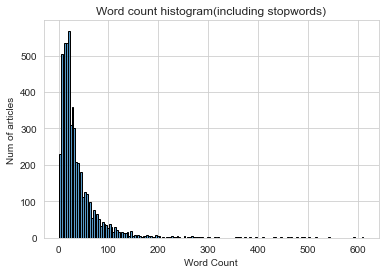

In [4]:
# word count with stopwords
def get_text_words_list(text):
    words = text.split()
    return words

def plot_words_count_hist(corpus):
    p = sb.histplot(corpus.map(lambda text: len(get_text_words_list(text))),edgecolor='black',linewidth=1)
    p.set_title('Word count histogram(including stopwords)')
    p.set_xlabel('Word Count')
    p.set_ylabel('Num of articles')
    plt.grid(True)
plot_words_count_hist(main_text)
print(main_text.map(lambda text: len(get_text_words_list(text))).argmax())
max_text = main_text[main_text.map(lambda text: len(get_text_words_list(text))).argmax()]
min_text = main_text[main_text.map(lambda text: len(get_text_words_list(text))).argmin()]
print(f"Max text(len={len(get_text_words_list(max_text))}):\n{max_text}")
print(f"Min text(len={len(get_text_words_list(min_text))}):\n{min_text}")

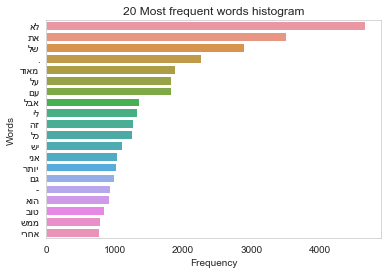

In [5]:
# plot 20 most freq words
def invert_words(words):
    return [w[::-1] for w in words]

def plot_top_n_words(corpus, n):
    corpus_words = corpus.map(lambda text: get_text_words_list(text)).explode()
    corpus_words_dict = corpus_words.value_counts()[:n].to_dict()
    p = sb.barplot(x=list(corpus_words_dict.values()),y=invert_words(list(corpus_words_dict.keys())))
    p.set_title(f'{n} Most frequent words histogram')
    p.set_xlabel('Frequency')
    p.set_ylabel('Words')
    plt.grid(axis='x')


plot_top_n_words(main_text,20)

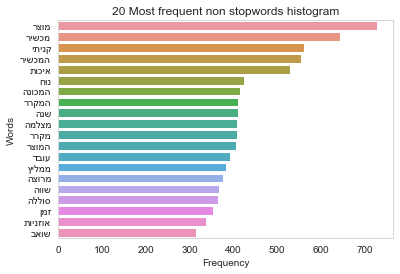

In [11]:
# plot 20 most freq non-stopwords words
def get_hebrew_stopwords():
    stop_path="stopwords\\heb_stopwords.txt"
    with open(stop_path, encoding="utf-8") as in_file:
        lines=in_file.readlines()
        res=[l.strip() for l in lines]
    return res

def plot_top_n_non_stopwords(corpus, n):
    corpus_words = corpus.map(lambda text: get_text_words_list(text)).explode()
    stop_words = get_hebrew_stopwords()
    corpus_words_dict = corpus_words[~corpus_words.isin(stop_words)].value_counts()[:n].to_dict()
    p = sb.barplot(x=list(corpus_words_dict.values()),y=invert_words(list(corpus_words_dict.keys())))
    p.set_title(f'{n} Most frequent non stopwords histogram')
    p.set_xlabel('Frequency')
    p.set_ylabel('Words')
    plt.grid(axis='x')
plot_top_n_non_stopwords(main_text,20)

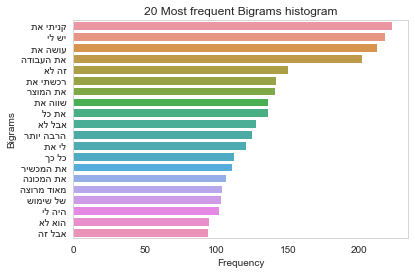

In [7]:
#plot most freq bigrams
def get_top_ngram(corpus, ngram=2, top_k=20):
    vec = CountVectorizer(token_pattern='\S+' ,ngram_range=(ngram, ngram)).fit(corpus) # adding token_pattern as guided
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                    for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_k]

def plot_top_k_ngram(corpus, ngram=2, top_k=20):
    top_k_ngrams = get_top_ngram(corpus,ngram,top_k)
    x,y=map(list,zip(*top_k_ngrams))
    p = sb.barplot(x=y,y=invert_words(x))
    ngram_str = ''
    if ngram == 2:
        ngram_str = 'Bigram'
    elif ngram == 3:
        ngram_str = 'Trigram'
    p.set_title(f'{top_k} Most frequent {ngram_str}s histogram')
    p.set_xlabel('Frequency')
    p.set_ylabel(f'{ngram_str}s')
    plt.grid(axis='x')

plot_top_k_ngram(main_text)

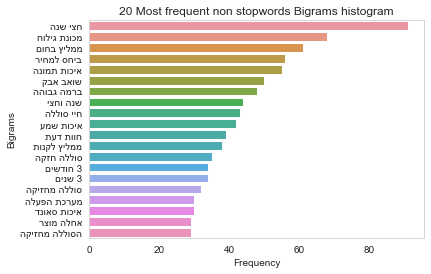

In [8]:
#plot most freq non-stopwords bigrams
def get_hebrew_stopwords():
    stop_path="stopwords\\heb_stopwords.txt"
    with open(stop_path, encoding="utf-8") as in_file:
        lines=in_file.readlines()
        res=[l.strip() for l in lines]
    return res

def plot_top_k_non_stopwords_ngram(corpus, ngram=2, top_k=20):
    vec = CountVectorizer(token_pattern='\S+',ngram_range=(ngram, ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                for word, idx in vec.vocabulary_.items()]
    ngrams_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    stop_words = get_hebrew_stopwords()

    ngram_str = ''
    if ngram == 2:
        ngram_str = 'Bigram'
    elif ngram == 3:
        ngram_str = 'Trigram'

    grams_df = pd.DataFrame(ngrams_freq, columns=[ngram_str,'freq'])
    if ngram == 2:
        grams_df['non_stopwords'] = grams_df[ngram_str].map(lambda t:t.split()[0] not in stop_words and t.split()[1] not in stop_words)
    if ngram == 3:
                grams_df['non_stopwords'] = grams_df[ngram_str].map(lambda t:t.split()[0] not in stop_words and t.split()[1] not in stop_words and t.split()[2] not in stop_words)
    grams_df_non_stopwords = grams_df[grams_df['non_stopwords'] == True].sort_values(by=['freq'],ascending=False)
    top_k_df = grams_df_non_stopwords.head(top_k)
    p = sb.barplot(x=grams_df_non_stopwords['freq'][:top_k],y=invert_words(grams_df_non_stopwords[ngram_str][:top_k]))
    p.set_title(f'{top_k} Most frequent non stopwords {ngram_str}s histogram')
    p.set_xlabel('Frequency')
    p.set_ylabel(f'{ngram_str}s')
    plt.grid(axis='x')

plot_top_k_non_stopwords_ngram(main_text)

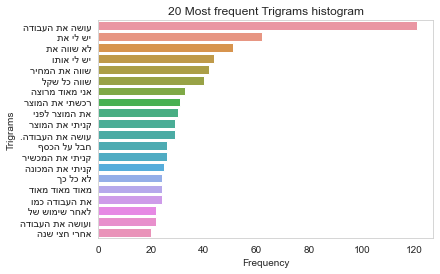

In [9]:
#plot most freq trigrams
plot_top_k_ngram(main_text,ngram=3)

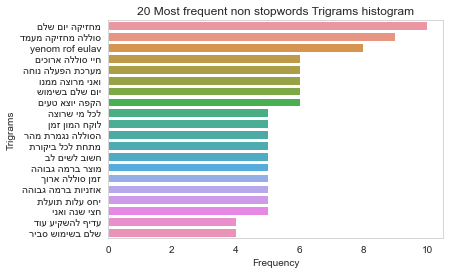

In [10]:
#plot most freq non-stopwords trigrams
plot_top_k_non_stopwords_ngram(main_text, ngram=3)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\orig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


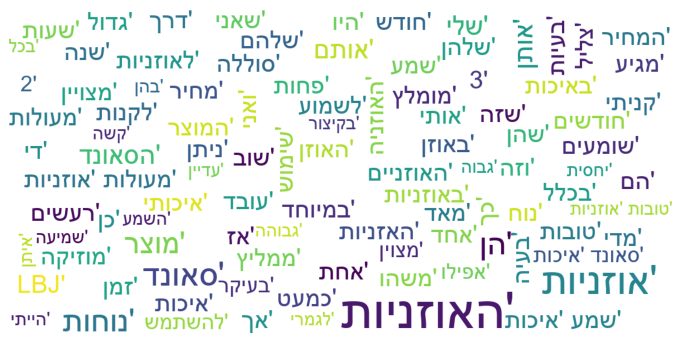

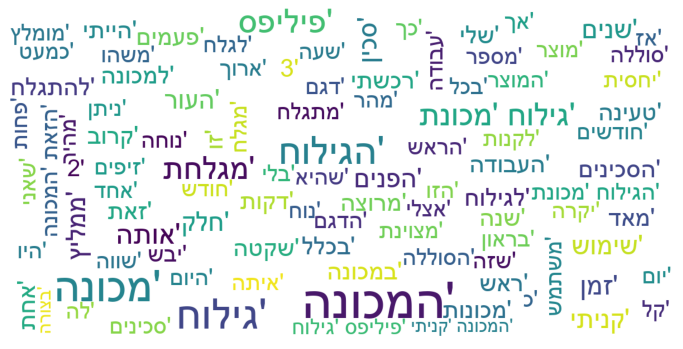

In [10]:
# word cloud for 2 classes
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, stop):
    #nltk.download('stopwords')
    #stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            #words=[lem.lemmatize(w) for w in words if len(w)>2]
            words=invert_words(words)
            corpus.append(words)
        return corpus

    corpus=_preprocess_text(text)

    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30,
        font_path='arial',
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

plot_wordcloud(df[df['category']=='e-headphone']['ReviewMainTxt'], get_hebrew_stopwords())
plot_wordcloud(df[df['category']=='e-shavingmachine']['ReviewMainTxt'], get_hebrew_stopwords())


In [11]:
# lematization of the corpus
class Processor:
    def __init__(self):
        self.heb_nlp = stanza.Pipeline(lang='he', processors='tokenize,mwt,pos,lemma,depparse')
        #replace MY_TOKEN with the token you got from the langndata website
        self.yap_token="e38e188b2389e98f522cea26fcf0cab0"

    def print_stanza_analysis(self, text):
        text += " XX"
        doc=self.heb_nlp(text)
        lst=[]
        for sen in doc.sentences:
            for token in sen.tokens:
                for word in token.words:
                    features=[(word.text,
                               word.lemma,
                               word.upos,
                               word.xpos,
                               word.head,
                               word.deprel,
                               word.feats)]

                    df=pd.DataFrame(features, columns=["text", "lemma", "upos", "xpos", "head", "deprel","feats"])
                    lst.append(df)
        tot_df=pd.concat(lst, ignore_index=True)
        tot_df=tot_df.shift(1).iloc[1:]
        tot_df["head"]=tot_df["head"].astype(int)
        #print(tot_df.head(50))
        return tot_df

    def print_yap_analysis(self, text):
        text= text.replace(r'"', r'\"')
        url = f'https://www.langndata.com/api/heb_parser?token={self.yap_token}'
        _json='{"data":"'+text.strip()+'"}'
#         print(url)
#         print(_json)
        headers = {'content-type': 'application/json'}
        sleep(0.5)
        r = requests.post(url,  data=_json.encode('utf-8'), headers={'Content-type': 'application/json; charset=utf-8'})
        json_obj=r.json()
        md_lattice=json_obj["md_lattice"]
        res_df=pd.io.json.json_normalize([md_lattice[i] for i in md_lattice.keys()])
        #print(res_df)
        return res_df

In [12]:
processor=Processor()
stanza_text = processor.print_stanza_analysis(main_text[0])
yap_text = processor.print_yap_analysis(main_text[0])

2022-06-14 14:01:16 INFO: Loading these models for language: he (Hebrew):
| Processor | Package |
-----------------------
| tokenize  | htb     |
| mwt       | htb     |
| pos       | htb     |
| lemma     | htb     |
| depparse  | htb     |

2022-06-14 14:01:16 INFO: Use device: cpu
2022-06-14 14:01:16 INFO: Loading: tokenize
2022-06-14 14:01:16 INFO: Loading: mwt
2022-06-14 14:01:16 INFO: Loading: pos
2022-06-14 14:01:16 INFO: Loading: lemma
2022-06-14 14:01:16 INFO: Loading: depparse
2022-06-14 14:01:17 INFO: Done loading processors!
C:\Users\orig\AppData\Local\Temp\1\ipykernel_16552\24860580.py:42: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  res_df=pd.io.json.json_normalize([md_lattice[i] for i in md_lattice.keys()])


In [13]:
list(stanza_text['lemma'])

['מחשב',
 'נוח',
 'ו',
 'כיפי',
 'המליץ',
 'מאוד',
 'ל',
 'איש',
 'אפל',
 '(',
 'ניתן',
 'ל',
 'ה',
 'סנכרן',
 'את',
 'הוא',
 'עם',
 'ה',
 'איירפודס',
 'ו',
 'ה',
 'אייפון',
 ')',
 '.']

In [14]:
yap_text

,empty,gen,lemma,num,num_2,num_last,num_s_p,per,pos,pos_2,tense,word
0,-1,-1,מ,0,1,1,-1,-1,PREPOSITION,PREPOSITION,-1,מ
1,-1,M,חשב,1,2,1,S,-1,NN,NN,-1,חשב
2,-1,M,נוח,2,3,2,S,-1,JJ,JJ,-1,נוח
3,-1,-1,ו,3,4,3,-1,-1,CONJ,CONJ,-1,ו
4,-1,M,כיף,4,5,3,S,-1,NN,NN,-1,כיפי
5,-1,F,המליץ,5,6,4,S,A,BN,BN,-1,ממליצה
6,-1,-1,מאוד,6,7,5,-1,-1,RB,RB,-1,מאוד
7,-1,-1,ל,7,8,6,-1,-1,PREPOSITION,PREPOSITION,-1,ל
8,-1,M,איש,8,9,6,P,-1,NN,NN,-1,אנשיי
9,-1,M,אפל,9,10,7,S,-1,JJ,JJ,-1,אפל
